In [116]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to WordNet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def preprocess_lyrics(lyrics):
    # Tokenize the lyrics
    tokens = word_tokenize(lyrics)
    tokens = [word for word in tokens if word.isalnum()]

    # Perform POS tagging
    tagged_tokens = pos_tag(tokens)

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize the tokens based on their POS tags
    lemmatized_tokens = []
    for word, tag in tagged_tokens:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag is None:
            # If no corresponding WordNet POS tag, keep the word as is
            lemmatized_tokens.append(word.lower())
        else:
            # Lemmatize the word with the appropriate POS tag
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos=wn_tag))

    return lemmatized_tokens

In [130]:
import utility_functions as utils
import importlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import itertools
from collections import Counter
import os

importlib.reload(utils)
path_to_east_coast_lyrics = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Lyrics/east_coast'
path_to_west_coast_lyrics = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Lyrics/west_coast'

concreteness_df = pd.read_excel('./concreteness.xlsx')
concreteness_ratings = concreteness_df.set_index('Word')['Conc.M'].to_dict()

In [118]:
# Load data into dataframes
east_coast_df = utils.load_txt_into_dataframe(path_to_east_coast_lyrics)
west_coast_df = utils.load_txt_into_dataframe(path_to_west_coast_lyrics)

In [119]:
# Clean up lyrics column
east_coast_df['Lyrics'] = east_coast_df['Lyrics'].apply(utils.cleanup)
west_coast_df['Lyrics'] = west_coast_df['Lyrics'].apply(utils.cleanup)

In [120]:
# Preprocessing lyrics
east_coast_df['Lyrics'] = east_coast_df['Lyrics'].apply(preprocess_lyrics)
west_coast_df['Lyrics'] = west_coast_df['Lyrics'].apply(preprocess_lyrics)

In [121]:
east_coast_df = utils.calculate_correctness_score_of_tokens(east_coast_df, concreteness_ratings)
west_coast_df = utils.calculate_correctness_score_of_tokens(west_coast_df, concreteness_ratings)

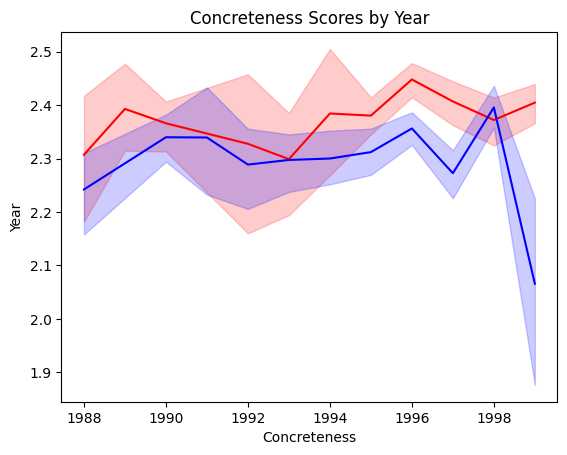

In [133]:
sns.lineplot(east_coast_df, x="Album Release Year", y='Correctness', color="red")
sns.lineplot(west_coast_df, x="Album Release Year", y='Correctness', color="blue")
plt.title("Concreteness Scores by Year")
plt.xlabel('Concreteness')
plt.ylabel('Year')
# Display the plot
plt.show()